In [1]:
import numpy as np

In [2]:
# we are solving realtionship btw inputs and output

# hours studied -> x
# output exam   -> y

# we want to fit the data 
# for that we are using "linear eqation"
# y = wx + b

In [3]:
# creating dataset

x = np.array([1,2,3,4,5],dtype= float)
# x is input feature (m samples)
y = np.array([2,4,5,4,5],dtype = float)
# y is traget value later we gonna predit

In [4]:
# our model y_hat = wX+b 
#  y_hat menas predict; captial X is means dataset

def predict (X,w,b): #model for prediction fn 
    return w*X+b

How do we measure whether a model is good or bad?

To measure how good or bad a model is, we use a **loss function**.  
A **loss function** tells us **how wrong the model’s predictions are**.

---

Loss function vs Cost function

- **Loss function**  
  Measures error for **one data point**

- **Cost function**  
  Measures the **average loss over the entire dataset**

👉 Since we are using **Mean Squared Error (MSE)** over all samples, it is **technically a cost function**.

---

Mean Squared Error (MSE)

Mean Squared Error measures the **average of squared differences** between the predicted value and the true value.  
Why squared?  
Penalizes big errors more ; Smooth → easy to differentiat

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

**Where:**
- m : number of samples  
- ŷᵢ : predicted value  
- yᵢ : true value


---

Why do we square the error?

- Makes all errors **positive**
- Penalizes **large errors more**
- Makes the function **smooth and differentiable** (important for gradient descent)

---

Key takeaway

- We measure model quality using a **loss / cost function**
- **MSE** is commonly used in **linear regression**
- Lower MSE ⇒ **better model**
- Higher MSE ⇒ **worse model**


In [5]:
def mse_loss(y_true, y_pred):
    return np.mean((y_pred-y_true) **2)

# y_true is from dataset y column
# y_pred is output from model/linear equation y_pred = m * x + b

In [6]:
# in linear equation model w and b start with random number 
# so we use gradient descent to compute loss and update parameter 

 Deriving Gradients (VERY IMPORTANT)

 Loss Function (Mean Squared Error)

$$
L = \frac{1}{m} \sum_{i=1}^{m} (w x_i + b - y_i)^2
$$

---

 Gradient with respect to **w**

$$
\frac{\partial L}{\partial w}
= \frac{2}{m} \sum_{i=1}^{m} (w x_i + b - y_i)\, x_i
$$

---

 Gradient with respect to **b**

$$
\frac{\partial L}{\partial b}
= \frac{2}{m} \sum_{i=1}^{m} (w x_i + b - y_i)
$$

---

 Intuition

- These gradients tell us **how much to change**:
  - **w** (slope / weight)
  - **b** (bias)
- They are used in **gradient descent** to minimize the loss.

---

 Gradient Descent Update Rule

$$
w = w - \alpha \frac{\partial L}{\partial w}
$$

$$
b = b - \alpha \frac{\partial L}{\partial b}
$$

Where:
- α : learning rate

Gradient Descent (general)

θ = θ − α ∇θ L

Linear Regression

w = w − α (∂L / ∂w)  
b = b − α (∂L / ∂b)

With MSE gradients

w = w − α (2/m) ∑ (w xᵢ + b − yᵢ) xᵢ  
b = b − α (2/m) ∑ (w xᵢ + b − yᵢ)

In [16]:
## full training loop

# intial parameter
w = 0.0
b = 0.0

learning_rate = 0.01
epochs = 1000
X = x
y_true = y
m = len(X)

for epoch in range(epochs):
    # forward pass
    y_pred = predict(X,w,b)
    
    #compute loss
    loss = mse_loss(y_true, y_pred)
    
    # gradient 
    dw = (2/m) * np.sum((y_pred - y) * X)
    db = (2/m) * np.sum(y_pred -y)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # print occasionally
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.4f}, b={b:.4f}")

Epoch 0: Loss=17.2000, w=0.2640, b=0.0800
Epoch 100: Loss=0.8099, w=0.9716, b=0.8583
Epoch 200: Loss=0.6476, w=0.8649, b=1.2437
Epoch 300: Loss=0.5651, w=0.7888, b=1.5185
Epoch 400: Loss=0.5232, w=0.7345, b=1.7143
Epoch 500: Loss=0.5020, w=0.6959, b=1.8538
Epoch 600: Loss=0.4912, w=0.6683, b=1.9533
Epoch 700: Loss=0.4857, w=0.6487, b=2.0241
Epoch 800: Loss=0.4829, w=0.6347, b=2.0747
Epoch 900: Loss=0.4815, w=0.6247, b=2.1107


In [11]:
x_new = np.array([6, 7, 8])
predictions = predict(x_new, w, b)

print(predictions)


[5.84228452 6.45997913 7.07767374]


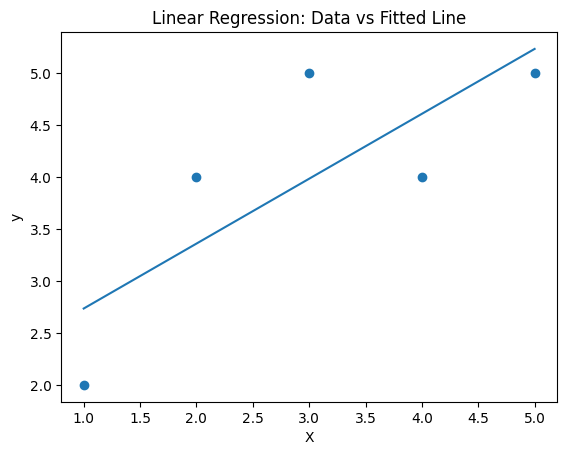

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
X = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 5, 4, 5], dtype=float)

# Learned parameters (use your final values)
w = 0.6247
b = 2.1107

# Predictions
y_pred = w * X + b

# Plot
plt.figure()
plt.scatter(X, y)          # actual data
plt.plot(X, y_pred)        # fitted line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Data vs Fitted Line")
plt.show()
